## Problem Statement : Find a replacement for M.Salah for Liverpool FC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Premier_league.csv')

## EDA

In [ ]:
df.head()

,Unnamed: 0,name,age,nationality,team,season,competition,goals,assists,minutes_played,position,ground_shots,ground_shots_successful,ground_shots_box,ground_shots_box_successful,headed_shots,headed_shots_successful,ground_passes,ground_passes_successful,ground_passes_attacking_third,ground_passes_attacking_third_successful,ground_passes_box,ground_passes_box_successful,headed_passes,headed_passes_successful,headed_passes_attacking_third,headed_passes_attacking_third_successful,headed_passes_box,headed_passes_box_successful,crosses,crosses_successful,blocks,tackles,tackles_successful,defensive_ground_duels,defensive_ground_duels_successful,defensive_aerial_duels,defensive_aerial_duels_successful,ground_clearances,headed_clearances,ground_interceptions,headed_interceptions
0,0,Mohamed Salah,26,Egypt,Liverpool,2017,Premier League,32,10,2923,Attacker,132,29,100,26,10,3,829,664,499,366,100,51,51,20,29,12,8,0,25,11,13,26,6,26,11,4,4,2,4,8,0
1,1,Mohamed Salah,26,Egypt,Liverpool,2018,Premier League,21,8,3101,Attacker,112,17,71,15,6,0,834,653,535,396,121,69,38,21,22,14,11,5,22,9,10,18,9,38,18,13,2,4,3,7,2
2,2,David Silva,33,Spain,Manchester City,2016,Premier League,4,7,2768,Midfielder,48,6,28,7,0,0,1863,1654,932,778,209,149,65,36,19,8,9,5,43,10,45,53,15,58,34,19,5,14,9,17,0
3,3,David Silva,33,Spain,Manchester City,2017,Premier League,9,11,2440,Midfielder,53,9,33,10,4,0,2248,2021,985,808,201,122,56,39,11,10,6,3,44,11,31,46,11,45,25,13,8,7,4,20,3
4,4,David Silva,33,Spain,Manchester City,2018,Premier League,6,6,2244,Midfielder,35,6,32,5,5,0,1498,1333,694,562,157,100,45,26,12,5,8,4,39,7,17,18,2,43,24,13,8,10,0,19,3


In [ ]:
df.shape

(4900, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Unnamed: 0                                4900 non-null   int64 
 1   name                                      4900 non-null   object
 2   age                                       4900 non-null   int64 
 3   nationality                               4900 non-null   object
 4   team                                      4900 non-null   object
 5   season                                    4900 non-null   int64 
 6   competition                               4900 non-null   object
 7   goals                                     4900 non-null   int64 
 8   assists                                   4900 non-null   int64 
 9   minutes_played                            4900 non-null   int64 
 10  position                                  4900 n

In [ ]:
df.isnull().sum()

Unnamed: 0                                  0
name                                        0
age                                         0
nationality                                 0
team                                        0
season                                      0
competition                                 0
goals                                       0
assists                                     0
minutes_played                              0
position                                    0
ground_shots                                0
ground_shots_successful                     0
ground_shots_box                            0
ground_shots_box_successful                 0
headed_shots                                0
headed_shots_successful                     0
ground_passes                               0
ground_passes_successful                    0
ground_passes_attacking_third               0
ground_passes_attacking_third_successful    0
ground_passes_box                 

In [ ]:
df.describe()

,Unnamed: 0,age,season,goals,assists,minutes_played,ground_shots,ground_shots_successful,ground_shots_box,ground_shots_box_successful,headed_shots,headed_shots_successful,ground_passes,ground_passes_successful,ground_passes_attacking_third,ground_passes_attacking_third_successful,ground_passes_box,ground_passes_box_successful,headed_passes,headed_passes_successful,headed_passes_attacking_third,headed_passes_attacking_third_successful,headed_passes_box,headed_passes_box_successful,crosses,crosses_successful,blocks,tackles,tackles_successful,defensive_ground_duels,defensive_ground_duels_successful,defensive_aerial_duels,defensive_aerial_duels_successful,ground_clearances,headed_clearances,ground_interceptions,headed_interceptions
count,4900.00000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000
mean,2449.50000,1.739592,2016.937551,1.467347,1.040408,1119.600408,12.250816,1.523265,6.690816,1.282041,3.353061,0.521837,341.745714,301.200816,92.973265,72.114490,12.409796,7.652041,51.711429,26.796531,15.710000,6.661020,4.207143,1.724490,16.267143,4.576735,16.317347,17.556122,7.816939,24.960816,13.208163,26.237551,15.995102,15.212041,17.555102,14.562041,2.423265
std,1414.65249,6.717003,0.808822,3.128786,1.947463,1175.722014,18.552292,2.826563,10.907904,2.537983,6.040977,1.373403,430.907191,389.235569,133.384994,105.809627,20.255588,12.797684,74.069819,38.082709,28.091512,10.489995,7.887745,3.146685,27.600048,7.585239,19.368271,21.475495,9.879441,29.584213,16.372923,43.947382,28.801316,23.208440,33.803196,18.151334,3.993262
min,0.00000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1224.75000,0.000000,2016.000000,0.000000,0.000000,12.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2449.50000,0.000000,2017.000000,0.000000,0.000000,723.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,170.000000,144.000000,33.000000,25.000000,5.000000,3.000000,21.000000,11.000000,7.000000,4.000000,2.000000,0.000000,5.000000,0.000000,9.000000,9.000000,4.000000,13.000000,7.000000,8.000000,5.000000,6.000000,5.000000,7.000000,0.000000
75%,3674.25000,0.000000,2018.000000,1.000000,1.000000,2002.250000,16.000000,3.000000,8.000000,2.000000,5.000000,0.000000,541.250000,461.000000,137.000000,103.000000,16.000000,10.000000,75.000000,38.000000,21.000000,9.000000,6.000000,3.000000,19.000000,6.000000,27.000000,28.000000,13.000000,42.000000,21.000000,30.000000,17.000000,19.000000,18.000000,23.000000,4.000000
max,4899.00000,38.000000,2018.000000,32.000000,18.000000,4442.000000,141.000000,29.000000,108.000000,26.000000,65.000000,11.000000,3474.000000,3272.000000,1091.000000,975.000000,209.000000,149.000000,675.000000,322.000000,489.000000,175.000000,134.000000,59.000000,235.000000,65.000000,108.000000,125.000000,63.000000,190.000000,110.000000,356.000000,251.000000,183.000000,379.000000,123.000000,51.000000


In [ ]:
df['age'].unique()

array([26, 33, 27, 22, 24, 28, 25, 30, 21, 29, 34, 32, 23, 20, 18, 31, 38,
       35, 19, 36, 37,  0])

In [ ]:
df['nationality'].unique()

array(['Egypt', 'Spain', 'Brazil', 'Korea Republic', 'Portugal', 'Italy',
       'England', 'Senegal', 'Argentina', 'Guinea',
       'United Arab Emirates', 'Oman', 'Guinea-Bissau', 'Chinese Taipei',
       'Afghanistan', '0'], dtype=object)

In [ ]:
df[(df['nationality']=='Spain') & (df['age']==22)]

,Unnamed: 0,name,age,nationality,team,season,competition,goals,assists,minutes_played,position,ground_shots,ground_shots_successful,ground_shots_box,ground_shots_box_successful,headed_shots,headed_shots_successful,ground_passes,ground_passes_successful,ground_passes_attacking_third,ground_passes_attacking_third_successful,ground_passes_box,ground_passes_box_successful,headed_passes,headed_passes_successful,headed_passes_attacking_third,headed_passes_attacking_third_successful,headed_passes_box,headed_passes_box_successful,crosses,crosses_successful,blocks,tackles,tackles_successful,defensive_ground_duels,defensive_ground_duels_successful,defensive_aerial_duels,defensive_aerial_duels_successful,ground_clearances,headed_clearances,ground_interceptions,headed_interceptions
124,124,Mikel Merino,22,Spain,Newcastle United,2017,Premier League,1,1,1344,Midfielder,16,0,4,0,4,0,619,541,164,126,20,10,85,45,12,10,4,5,6,0,41,56,20,68,40,54,31,11,14,36,0
136,136,Angeliño,22,Spain,Manchester City,2016,Premier League,0,0,0,Defender,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,143,Hugo Díaz,22,Spain,Leeds United,2017,Championship,0,0,33,Defender,0,0,0,0,0,0,8,9,3,4,0,0,2,3,0,0,0,0,0,0,0,4,4,0,0,3,4,6,2,0,0
144,144,Hugo Díaz,22,Spain,Leeds United,2018,Championship,0,0,0,Defender,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
172,172,Sergi Canós,22,Spain,Norwich City,2016,Championship,0,0,105,Midfielder,5,0,4,0,0,0,24,17,13,11,5,5,5,2,0,0,0,0,6,0,8,4,0,9,6,0,0,0,0,0,0
173,173,Sergi Canós,22,Spain,Brentford,2016,Championship,4,1,1099,Midfielder,48,6,27,6,4,0,253,192,155,112,34,19,20,9,9,4,3,3,20,3,15,28,7,46,24,8,9,3,0,16,4
174,174,Sergi Canós,22,Spain,Brentford,2017,Championship,3,2,1401,Midfielder,67,2,35,2,10,4,328,227,211,133,41,19,22,6,11,5,0,0,43,5,28,34,14,44,19,8,6,5,3,16,4
175,175,Sergi Canós,22,Spain,Brentford,2018,Championship,7,5,2119,Midfielder,78,13,37,10,9,0,515,363,298,193,67,31,26,8,18,6,5,2,57,10,39,36,13,58,28,18,4,7,9,13,0
307,307,Madger Antonio,22,Spain,Leeds United,2017,Championship,0,0,0,Midfielder,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['position'].unique()

array(['Attacker', 'Midfielder', 'Defender', 'Goalkeeper'], dtype=object)

In [ ]:
# age profile

df = df[(df['age']>=25)&(df['age']<27)]

In [ ]:
df.head()

,Unnamed: 0,name,age,nationality,team,season,competition,goals,assists,minutes_played,position,ground_shots,ground_shots_successful,ground_shots_box,ground_shots_box_successful,headed_shots,headed_shots_successful,ground_passes,ground_passes_successful,ground_passes_attacking_third,ground_passes_attacking_third_successful,ground_passes_box,ground_passes_box_successful,headed_passes,headed_passes_successful,headed_passes_attacking_third,headed_passes_attacking_third_successful,headed_passes_box,headed_passes_box_successful,crosses,crosses_successful,blocks,tackles,tackles_successful,defensive_ground_duels,defensive_ground_duels_successful,defensive_aerial_duels,defensive_aerial_duels_successful,ground_clearances,headed_clearances,ground_interceptions,headed_interceptions
0,0,Mohamed Salah,26,Egypt,Liverpool,2017,Premier League,32,10,2923,Attacker,132,29,100,26,10,3,829,664,499,366,100,51,51,20,29,12,8,0,25,11,13,26,6,26,11,4,4,2,4,8,0
1,1,Mohamed Salah,26,Egypt,Liverpool,2018,Premier League,21,8,3101,Attacker,112,17,71,15,6,0,834,653,535,396,121,69,38,21,22,14,11,5,22,9,10,18,9,38,18,13,2,4,3,7,2
8,8,Philippe Coutinho,26,Brazil,Liverpool,2016,Premier League,13,7,2246,Midfielder,96,12,35,10,7,0,1224,1053,646,512,122,75,39,21,19,10,7,4,33,7,37,60,13,43,26,11,5,7,4,20,0
9,9,Philippe Coutinho,26,Brazil,Liverpool,2017,Premier League,7,6,1117,Midfielder,45,6,15,3,5,4,557,468,298,231,55,36,19,11,3,5,0,0,15,9,15,23,6,22,17,5,2,4,3,13,0
10,10,Son Heung-Min,26,Korea Republic,Tottenham Hotspur,2016,Premier League,14,6,2067,Attacker,81,14,56,11,4,0,726,594,427,331,66,44,26,12,10,5,2,0,39,9,20,25,8,26,17,7,3,4,5,7,4


In [ ]:
df['age'].unique()

array([26, 25])

In [ ]:
df = df[df['nationality']!=0]

In [ ]:
df['nationality'].unique()

array(['Egypt', 'Brazil', 'Korea Republic', 'Spain', 'Portugal',
       'United Arab Emirates', 'Guinea-Bissau', 'Chinese Taipei'],
      dtype=object)

In [ ]:
# minutes played 

df = df[df['minutes_played'] >=450]

In [ ]:
df['minutes_played'].min()

454

In [ ]:
# Removing goalkeepers
df = df[df['position']!='Goalkeeper']


In [ ]:
df['position'].unique()

array(['Attacker', 'Midfielder', 'Defender'], dtype=object)

In [ ]:
# Goals scored by a player per 90 minutes
df.loc[:,'goals'] = round(df.loc[:,'goals'].div(df.minutes_played,axis=0)*90,2)

In [ ]:
df.head()

,Unnamed: 0,name,age,nationality,team,season,competition,goals,assists,minutes_played,position,ground_shots,ground_shots_successful,ground_shots_box,ground_shots_box_successful,headed_shots,headed_shots_successful,ground_passes,ground_passes_successful,ground_passes_attacking_third,ground_passes_attacking_third_successful,ground_passes_box,ground_passes_box_successful,headed_passes,headed_passes_successful,headed_passes_attacking_third,headed_passes_attacking_third_successful,headed_passes_box,headed_passes_box_successful,crosses,crosses_successful,blocks,tackles,tackles_successful,defensive_ground_duels,defensive_ground_duels_successful,defensive_aerial_duels,defensive_aerial_duels_successful,ground_clearances,headed_clearances,ground_interceptions,headed_interceptions
0,0,Mohamed Salah,26,Egypt,Liverpool,2017,Premier League,0.99,10,2923,Attacker,132,29,100,26,10,3,829,664,499,366,100,51,51,20,29,12,8,0,25,11,13,26,6,26,11,4,4,2,4,8,0
1,1,Mohamed Salah,26,Egypt,Liverpool,2018,Premier League,0.61,8,3101,Attacker,112,17,71,15,6,0,834,653,535,396,121,69,38,21,22,14,11,5,22,9,10,18,9,38,18,13,2,4,3,7,2
8,8,Philippe Coutinho,26,Brazil,Liverpool,2016,Premier League,0.52,7,2246,Midfielder,96,12,35,10,7,0,1224,1053,646,512,122,75,39,21,19,10,7,4,33,7,37,60,13,43,26,11,5,7,4,20,0
9,9,Philippe Coutinho,26,Brazil,Liverpool,2017,Premier League,0.56,6,1117,Midfielder,45,6,15,3,5,4,557,468,298,231,55,36,19,11,3,5,0,0,15,9,15,23,6,22,17,5,2,4,3,13,0
10,10,Son Heung-Min,26,Korea Republic,Tottenham Hotspur,2016,Premier League,0.61,6,2067,Attacker,81,14,56,11,4,0,726,594,427,331,66,44,26,12,10,5,2,0,39,9,20,25,8,26,17,7,3,4,5,7,4


In [ ]:
stand_90 = ['assists', 'minutes_played',
       'ground_shots', 'ground_shots_successful', 'ground_shots_box',
       'ground_shots_box_successful', 'headed_shots',
       'headed_shots_successful', 'ground_passes', 'ground_passes_successful',
       'ground_passes_attacking_third',
       'ground_passes_attacking_third_successful', 'ground_passes_box',
       'ground_passes_box_successful', 'headed_passes',
       'headed_passes_successful', 'headed_passes_attacking_third',
       'headed_passes_attacking_third_successful', 'headed_passes_box',
       'headed_passes_box_successful', 'crosses', 'crosses_successful',
       'blocks', 'tackles', 'tackles_successful', 'defensive_ground_duels',
       'defensive_ground_duels_successful', 'defensive_aerial_duels',
       'defensive_aerial_duels_successful', 'ground_clearances',
       'headed_clearances', 'ground_interceptions', 'headed_interceptions']

In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'age', 'nationality', 'team', 'season',
       'competition', 'goals', 'assists', 'minutes_played', 'position',
       'ground_shots', 'ground_shots_successful', 'ground_shots_box',
       'ground_shots_box_successful', 'headed_shots',
       'headed_shots_successful', 'ground_passes', 'ground_passes_successful',
       'ground_passes_attacking_third',
       'ground_passes_attacking_third_successful', 'ground_passes_box',
       'ground_passes_box_successful', 'headed_passes',
       'headed_passes_successful', 'headed_passes_attacking_third',
       'headed_passes_attacking_third_successful', 'headed_passes_box',
       'headed_passes_box_successful', 'crosses', 'crosses_successful',
       'blocks', 'tackles', 'tackles_successful', 'defensive_ground_duels',
       'defensive_ground_duels_successful', 'defensive_aerial_duels',
       'defensive_aerial_duels_successful', 'ground_clearances',
       'headed_clearances', 'ground_interceptions', 'headed_inter

In [ ]:
df.loc[:,stand_90] = round(df.loc[:,stand_90].div(df.minutes_played,axis=0)*90,2)

In [ ]:
df.head()

,Unnamed: 0,name,age,nationality,team,season,competition,goals,assists,minutes_played,position,ground_shots,ground_shots_successful,ground_shots_box,ground_shots_box_successful,headed_shots,headed_shots_successful,ground_passes,ground_passes_successful,ground_passes_attacking_third,ground_passes_attacking_third_successful,ground_passes_box,ground_passes_box_successful,headed_passes,headed_passes_successful,headed_passes_attacking_third,headed_passes_attacking_third_successful,headed_passes_box,headed_passes_box_successful,crosses,crosses_successful,blocks,tackles,tackles_successful,defensive_ground_duels,defensive_ground_duels_successful,defensive_aerial_duels,defensive_aerial_duels_successful,ground_clearances,headed_clearances,ground_interceptions,headed_interceptions
0,0,Mohamed Salah,26,Egypt,Liverpool,2017,Premier League,0.99,0.31,90.0,Attacker,4.06,0.89,3.08,0.80,0.31,0.09,25.53,20.44,15.36,11.27,3.08,1.57,1.57,0.62,0.89,0.37,0.25,0.00,0.77,0.34,0.40,0.80,0.18,0.80,0.34,0.12,0.12,0.06,0.12,0.25,0.00
1,1,Mohamed Salah,26,Egypt,Liverpool,2018,Premier League,0.61,0.23,90.0,Attacker,3.25,0.49,2.06,0.44,0.17,0.00,24.21,18.95,15.53,11.49,3.51,2.00,1.10,0.61,0.64,0.41,0.32,0.15,0.64,0.26,0.29,0.52,0.26,1.10,0.52,0.38,0.06,0.12,0.09,0.20,0.06
8,8,Philippe Coutinho,26,Brazil,Liverpool,2016,Premier League,0.52,0.28,90.0,Midfielder,3.85,0.48,1.40,0.40,0.28,0.00,49.05,42.20,25.89,20.52,4.89,3.01,1.56,0.84,0.76,0.40,0.28,0.16,1.32,0.28,1.48,2.40,0.52,1.72,1.04,0.44,0.20,0.28,0.16,0.80,0.00
9,9,Philippe Coutinho,26,Brazil,Liverpool,2017,Premier League,0.56,0.48,90.0,Midfielder,3.63,0.48,1.21,0.24,0.40,0.32,44.88,37.71,24.01,18.61,4.43,2.90,1.53,0.89,0.24,0.40,0.00,0.00,1.21,0.73,1.21,1.85,0.48,1.77,1.37,0.40,0.16,0.32,0.24,1.05,0.00
10,10,Son Heung-Min,26,Korea Republic,Tottenham Hotspur,2016,Premier League,0.61,0.26,90.0,Attacker,3.53,0.61,2.44,0.48,0.17,0.00,31.61,25.86,18.59,14.41,2.87,1.92,1.13,0.52,0.44,0.22,0.09,0.00,1.70,0.39,0.87,1.09,0.35,1.13,0.74,0.30,0.13,0.17,0.22,0.30,0.17


## Advanced Metrics

In [ ]:
df['ground_shots%'] = round(df['ground_shots_successful'] / df['ground_shots'],2)

In [ ]:
df.head()

,Unnamed: 0,name,age,nationality,team,season,competition,goals,assists,minutes_played,position,ground_shots,ground_shots_successful,ground_shots_box,ground_shots_box_successful,headed_shots,headed_shots_successful,ground_passes,ground_passes_successful,ground_passes_attacking_third,ground_passes_attacking_third_successful,ground_passes_box,ground_passes_box_successful,headed_passes,headed_passes_successful,headed_passes_attacking_third,headed_passes_attacking_third_successful,headed_passes_box,headed_passes_box_successful,crosses,crosses_successful,blocks,tackles,tackles_successful,defensive_ground_duels,defensive_ground_duels_successful,defensive_aerial_duels,defensive_aerial_duels_successful,ground_clearances,headed_clearances,ground_interceptions,headed_interceptions,ground_shots%
0,0,Mohamed Salah,26,Egypt,Liverpool,2017,Premier League,0.99,0.31,90.0,Attacker,4.06,0.89,3.08,0.80,0.31,0.09,25.53,20.44,15.36,11.27,3.08,1.57,1.57,0.62,0.89,0.37,0.25,0.00,0.77,0.34,0.40,0.80,0.18,0.80,0.34,0.12,0.12,0.06,0.12,0.25,0.00,0.22
1,1,Mohamed Salah,26,Egypt,Liverpool,2018,Premier League,0.61,0.23,90.0,Attacker,3.25,0.49,2.06,0.44,0.17,0.00,24.21,18.95,15.53,11.49,3.51,2.00,1.10,0.61,0.64,0.41,0.32,0.15,0.64,0.26,0.29,0.52,0.26,1.10,0.52,0.38,0.06,0.12,0.09,0.20,0.06,0.15
8,8,Philippe Coutinho,26,Brazil,Liverpool,2016,Premier League,0.52,0.28,90.0,Midfielder,3.85,0.48,1.40,0.40,0.28,0.00,49.05,42.20,25.89,20.52,4.89,3.01,1.56,0.84,0.76,0.40,0.28,0.16,1.32,0.28,1.48,2.40,0.52,1.72,1.04,0.44,0.20,0.28,0.16,0.80,0.00,0.12
9,9,Philippe Coutinho,26,Brazil,Liverpool,2017,Premier League,0.56,0.48,90.0,Midfielder,3.63,0.48,1.21,0.24,0.40,0.32,44.88,37.71,24.01,18.61,4.43,2.90,1.53,0.89,0.24,0.40,0.00,0.00,1.21,0.73,1.21,1.85,0.48,1.77,1.37,0.40,0.16,0.32,0.24,1.05,0.00,0.13
10,10,Son Heung-Min,26,Korea Republic,Tottenham Hotspur,2016,Premier League,0.61,0.26,90.0,Attacker,3.53,0.61,2.44,0.48,0.17,0.00,31.61,25.86,18.59,14.41,2.87,1.92,1.13,0.52,0.44,0.22,0.09,0.00,1.70,0.39,0.87,1.09,0.35,1.13,0.74,0.30,0.13,0.17,0.22,0.30,0.17,0.17


In [ ]:
df['ground_shots_box%'] = round(df['ground_shots_box_successful'] / df['ground_shots_box'],2)

df['headed_shots%'] = round(df['headed_shots_successful'] / df['headed_shots'],2)

df['ground_passes%'] = round(df['ground_passes_successful'] / df['ground_passes'],2)

df['ground_passes_attacking_third%'] = round(df['ground_passes_attacking_third_successful'] / df['ground_passes_attacking_third'],2)

df['ground_passes_box%'] = round(df['ground_passes_box_successful'] / df['ground_passes_box'],2)

df['headed_passes%'] = round(df['headed_passes_successful'] / df['headed_passes'],2)

df['headed_passes_attacking_third%'] = round(df['headed_passes_attacking_third_successful'] / df['headed_passes_attacking_third'],2)

df['headed_passes_box%'] = round(df['headed_passes_box_successful'] / df['headed_passes_box'],2)

df['crosses%'] = round(df['crosses_successful'] / df['crosses'] , 2)

df['tackles%'] = round(df['tackles_successful'] / df['tackles'] , 2)

df['defensive_ground_duels%'] = round(df['defensive_ground_duels_successful'] / df['defensive_ground_duels'] , 2)

df['defensive_aerial_duels%'] = round(df['defensive_aerial_duels_successful'] / df['defensive_aerial_duels'] , 2)




In [ ]:
df.isnull().sum()

Unnamed: 0                                  0
name                                        0
age                                         0
nationality                                 0
team                                        0
season                                      0
competition                                 0
goals                                       0
assists                                     0
minutes_played                              0
position                                    0
ground_shots                                0
ground_shots_successful                     0
ground_shots_box                            0
ground_shots_box_successful                 0
headed_shots                                0
headed_shots_successful                     0
ground_passes                               0
ground_passes_successful                    0
ground_passes_attacking_third               0
ground_passes_attacking_third_successful    0
ground_passes_box                 

In [ ]:
df = df.fillna(value=0)

In [ ]:
df.isnull().sum()

Unnamed: 0                                  0
name                                        0
age                                         0
nationality                                 0
team                                        0
season                                      0
competition                                 0
goals                                       0
assists                                     0
minutes_played                              0
position                                    0
ground_shots                                0
ground_shots_successful                     0
ground_shots_box                            0
ground_shots_box_successful                 0
headed_shots                                0
headed_shots_successful                     0
ground_passes                               0
ground_passes_successful                    0
ground_passes_attacking_third               0
ground_passes_attacking_third_successful    0
ground_passes_box                 

In [ ]:
df['goal_involvement'] = df['assists'] + df['goals']

In [ ]:
df.head()

,Unnamed: 0,name,age,nationality,team,season,competition,goals,assists,minutes_played,position,ground_shots,ground_shots_successful,ground_shots_box,ground_shots_box_successful,headed_shots,headed_shots_successful,ground_passes,ground_passes_successful,ground_passes_attacking_third,ground_passes_attacking_third_successful,ground_passes_box,ground_passes_box_successful,headed_passes,headed_passes_successful,headed_passes_attacking_third,headed_passes_attacking_third_successful,headed_passes_box,headed_passes_box_successful,crosses,crosses_successful,blocks,tackles,tackles_successful,defensive_ground_duels,defensive_ground_duels_successful,defensive_aerial_duels,defensive_aerial_duels_successful,ground_clearances,headed_clearances,ground_interceptions,headed_interceptions,ground_shots%,ground_shots_box%,headed_shots%,ground_passes%,ground_passes_attacking_third%,ground_passes_box%,headed_passes%,headed_passes_attacking_third%,headed_passes_box%,crosses%,tackles%,defensive_ground_duels%,defensive_aerial_duels%,goal_involvement
0,0,Mohamed Salah,26,Egypt,Liverpool,2017,Premier League,0.99,0.31,90.0,Attacker,4.06,0.89,3.08,0.80,0.31,0.09,25.53,20.44,15.36,11.27,3.08,1.57,1.57,0.62,0.89,0.37,0.25,0.00,0.77,0.34,0.40,0.80,0.18,0.80,0.34,0.12,0.12,0.06,0.12,0.25,0.00,0.22,0.26,0.29,0.80,0.73,0.51,0.39,0.42,0.00,0.44,0.22,0.42,1.00,1.30
1,1,Mohamed Salah,26,Egypt,Liverpool,2018,Premier League,0.61,0.23,90.0,Attacker,3.25,0.49,2.06,0.44,0.17,0.00,24.21,18.95,15.53,11.49,3.51,2.00,1.10,0.61,0.64,0.41,0.32,0.15,0.64,0.26,0.29,0.52,0.26,1.10,0.52,0.38,0.06,0.12,0.09,0.20,0.06,0.15,0.21,0.00,0.78,0.74,0.57,0.55,0.64,0.47,0.41,0.50,0.47,0.16,0.84
8,8,Philippe Coutinho,26,Brazil,Liverpool,2016,Premier League,0.52,0.28,90.0,Midfielder,3.85,0.48,1.40,0.40,0.28,0.00,49.05,42.20,25.89,20.52,4.89,3.01,1.56,0.84,0.76,0.40,0.28,0.16,1.32,0.28,1.48,2.40,0.52,1.72,1.04,0.44,0.20,0.28,0.16,0.80,0.00,0.12,0.29,0.00,0.86,0.79,0.62,0.54,0.53,0.57,0.21,0.22,0.60,0.45,0.80
9,9,Philippe Coutinho,26,Brazil,Liverpool,2017,Premier League,0.56,0.48,90.0,Midfielder,3.63,0.48,1.21,0.24,0.40,0.32,44.88,37.71,24.01,18.61,4.43,2.90,1.53,0.89,0.24,0.40,0.00,0.00,1.21,0.73,1.21,1.85,0.48,1.77,1.37,0.40,0.16,0.32,0.24,1.05,0.00,0.13,0.20,0.80,0.84,0.78,0.65,0.58,1.67,0.00,0.60,0.26,0.77,0.40,1.04
10,10,Son Heung-Min,26,Korea Republic,Tottenham Hotspur,2016,Premier League,0.61,0.26,90.0,Attacker,3.53,0.61,2.44,0.48,0.17,0.00,31.61,25.86,18.59,14.41,2.87,1.92,1.13,0.52,0.44,0.22,0.09,0.00,1.70,0.39,0.87,1.09,0.35,1.13,0.74,0.30,0.13,0.17,0.22,0.30,0.17,0.17,0.20,0.00,0.82,0.78,0.67,0.46,0.50,0.00,0.23,0.32,0.65,0.43,0.87


In [ ]:
# passing metrics
df['Total_pass'] = df['ground_passes'] + df['headed_passes']
df['Total_pass_attacking_third'] = df['ground_passes_attacking_third'] + df['headed_passes_attacking_third']
df['Total_pass_box'] = df['ground_passes_box'] + df['headed_passes_box']

# Successful
df['Total_pass_successful'] = df['ground_passes_successful'] + df['headed_passes_successful']
df['Total_pass_attacking_third_successful'] = df['ground_passes_attacking_third_successful'] + df['headed_passes_attacking_third_successful']
df['Toal_pass_box_successful'] = df['ground_passes_box_successful'] + df['headed_passes_box_successful']

# Accuracy
df['Total_pass%'] = df['Total_pass_successful'] / df['Total_pass']
df['Total_pass_attacking_third%'] = df['Total_pass_attacking_third_successful'] / df['Total_pass_attacking_third']
df['Total_pass_box%'] = df['Toal_pass_box_successful'] / df['Total_pass_box']

# Defense
df['Defensive_duel%'] = (df['defensive_aerial_duels_successful'] + df['defensive_ground_duels_successful']) / (df['defensive_aerial_duels'] + df['defensive_ground_duels'])
df['Interceptions'] = df['ground_interceptions'] + df['headed_interceptions']
df['Clearances'] = df['headed_clearances'] + df['ground_clearances']

In [ ]:
df.head()

,Unnamed: 0,name,age,nationality,team,season,competition,goals,assists,minutes_played,position,ground_shots,ground_shots_successful,ground_shots_box,ground_shots_box_successful,headed_shots,headed_shots_successful,ground_passes,ground_passes_successful,ground_passes_attacking_third,ground_passes_attacking_third_successful,ground_passes_box,ground_passes_box_successful,headed_passes,headed_passes_successful,headed_passes_attacking_third,headed_passes_attacking_third_successful,headed_passes_box,headed_passes_box_successful,crosses,crosses_successful,blocks,tackles,tackles_successful,defensive_ground_duels,defensive_ground_duels_successful,defensive_aerial_duels,defensive_aerial_duels_successful,ground_clearances,headed_clearances,ground_interceptions,headed_interceptions,ground_shots%,ground_shots_box%,headed_shots%,ground_passes%,ground_passes_attacking_third%,ground_passes_box%,headed_passes%,headed_passes_attacking_third%,headed_passes_box%,crosses%,tackles%,defensive_ground_duels%,defensive_aerial_duels%,goal_involvement,Total_pass,Total_pass_attacking_third,Total_pass_box,Total_pass_successful,Total_pass_attacking_third_successful,Toal_pass_box_successful,Total_pass%,Total_pass_attacking_third%,Total_pass_box%,Defensive_duel%,Interceptions,Clearances
0,0,Mohamed Salah,26,Egypt,Liverpool,2017,Premier League,0.99,0.31,90.0,Attacker,4.06,0.89,3.08,0.80,0.31,0.09,25.53,20.44,15.36,11.27,3.08,1.57,1.57,0.62,0.89,0.37,0.25,0.00,0.77,0.34,0.40,0.80,0.18,0.80,0.34,0.12,0.12,0.06,0.12,0.25,0.00,0.22,0.26,0.29,0.80,0.73,0.51,0.39,0.42,0.00,0.44,0.22,0.42,1.00,1.30,27.10,16.25,3.33,21.06,11.64,1.57,0.777122,0.716308,0.471471,0.500000,0.25,0.18
1,1,Mohamed Salah,26,Egypt,Liverpool,2018,Premier League,0.61,0.23,90.0,Attacker,3.25,0.49,2.06,0.44,0.17,0.00,24.21,18.95,15.53,11.49,3.51,2.00,1.10,0.61,0.64,0.41,0.32,0.15,0.64,0.26,0.29,0.52,0.26,1.10,0.52,0.38,0.06,0.12,0.09,0.20,0.06,0.15,0.21,0.00,0.78,0.74,0.57,0.55,0.64,0.47,0.41,0.50,0.47,0.16,0.84,25.31,16.17,3.83,19.56,11.90,2.15,0.772817,0.735931,0.561358,0.391892,0.26,0.21
8,8,Philippe Coutinho,26,Brazil,Liverpool,2016,Premier League,0.52,0.28,90.0,Midfielder,3.85,0.48,1.40,0.40,0.28,0.00,49.05,42.20,25.89,20.52,4.89,3.01,1.56,0.84,0.76,0.40,0.28,0.16,1.32,0.28,1.48,2.40,0.52,1.72,1.04,0.44,0.20,0.28,0.16,0.80,0.00,0.12,0.29,0.00,0.86,0.79,0.62,0.54,0.53,0.57,0.21,0.22,0.60,0.45,0.80,50.61,26.65,5.17,43.04,20.92,3.17,0.850425,0.784991,0.613153,0.574074,0.80,0.44
9,9,Philippe Coutinho,26,Brazil,Liverpool,2017,Premier League,0.56,0.48,90.0,Midfielder,3.63,0.48,1.21,0.24,0.40,0.32,44.88,37.71,24.01,18.61,4.43,2.90,1.53,0.89,0.24,0.40,0.00,0.00,1.21,0.73,1.21,1.85,0.48,1.77,1.37,0.40,0.16,0.32,0.24,1.05,0.00,0.13,0.20,0.80,0.84,0.78,0.65,0.58,1.67,0.00,0.60,0.26,0.77,0.40,1.04,46.41,24.25,4.43,38.60,19.01,2.90,0.831717,0.783918,0.654628,0.705069,1.05,0.56
10,10,Son Heung-Min,26,Korea Republic,Tottenham Hotspur,2016,Premier League,0.61,0.26,90.0,Attacker,3.53,0.61,2.44,0.48,0.17,0.00,31.61,25.86,18.59,14.41,2.87,1.92,1.13,0.52,0.44,0.22,0.09,0.00,1.70,0.39,0.87,1.09,0.35,1.13,0.74,0.30,0.13,0.17,0.22,0.30,0.17,0.17,0.20,0.00,0.82,0.78,0.67,0.46,0.50,0.00,0.23,0.32,0.65,0.43,0.87,32.74,19.03,2.96,26.38,14.63,1.92,0.805742,0.768786,0.648649,0.608392,0.47,0.39


In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'age', 'nationality', 'team', 'season',
       'competition', 'goals', 'assists', 'minutes_played', 'position',
       'ground_shots', 'ground_shots_successful', 'ground_shots_box',
       'ground_shots_box_successful', 'headed_shots',
       'headed_shots_successful', 'ground_passes', 'ground_passes_successful',
       'ground_passes_attacking_third',
       'ground_passes_attacking_third_successful', 'ground_passes_box',
       'ground_passes_box_successful', 'headed_passes',
       'headed_passes_successful', 'headed_passes_attacking_third',
       'headed_passes_attacking_third_successful', 'headed_passes_box',
       'headed_passes_box_successful', 'crosses', 'crosses_successful',
       'blocks', 'tackles', 'tackles_successful', 'defensive_ground_duels',
       'defensive_ground_duels_successful', 'defensive_aerial_duels',
       'defensive_aerial_duels_successful', 'ground_clearances',
       'headed_clearances', 'ground_interceptions', 'headed_inter

In [ ]:
# Subset Columns

df = df[['name', 'age', 'nationality', 'team', 'season',
       'competition', 'goals', 'assists', 'minutes_played', 'position','goal_involvement', 'Total_pass',
       'Total_pass_attacking_third', 'Total_pass_box', 'Total_pass_successful',
       'Total_pass_attacking_third_successful', 'Toal_pass_box_successful',
       'Total_pass%', 'Total_pass_attacking_third%', 'Total_pass_box%',
       'Defensive_duel%', 'Interceptions', 'Clearances','defensive_ground_duels','defensive_aerial_duels']]

In [ ]:
df_player = round(df.groupby('name').mean(),2).reset_index()

In [ ]:
df_player

,name,age,season,goals,assists,minutes_played,goal_involvement,Total_pass,Total_pass_attacking_third,Total_pass_box,Total_pass_successful,Total_pass_attacking_third_successful,Toal_pass_box_successful,Total_pass%,Total_pass_attacking_third%,Total_pass_box%,Defensive_duel%,Interceptions,Clearances,defensive_ground_duels,defensive_aerial_duels
0,Alberto Moreno,26.0,2017.00,0.00,0.00,90.0,0.00,48.67,10.74,1.49,43.68,8.96,1.21,0.90,0.83,0.81,0.62,1.21,3.06,2.21,1.71
1,André Gomes,25.0,2018.00,0.05,0.05,90.0,0.10,44.71,10.54,1.51,38.78,8.53,0.87,0.87,0.81,0.58,0.43,0.96,0.82,3.21,2.02
2,Ayoze Pérez,25.0,2017.00,0.33,0.16,90.0,0.50,22.59,10.78,2.55,16.77,7.22,1.20,0.74,0.67,0.47,0.49,1.10,0.97,2.67,0.53
3,Bernard,26.0,2018.00,0.05,0.14,90.0,0.19,28.18,13.37,2.04,22.49,9.85,1.40,0.80,0.74,0.69,0.68,1.31,0.59,2.17,0.23
4,Borja Bastón,26.0,2016.00,0.16,0.00,90.0,0.16,27.28,10.13,2.29,21.89,6.53,0.98,0.80,0.64,0.43,0.67,0.65,1.47,1.80,0.65
5,Dani Pinillos,26.0,2016.50,0.10,0.10,90.0,0.20,36.73,8.13,0.57,30.64,6.35,0.46,0.83,0.79,0.84,0.59,2.46,4.47,1.90,4.72
6,Derik Osede,26.0,2017.00,0.00,0.00,90.0,0.00,22.24,6.62,1.64,17.33,3.92,0.90,0.78,0.59,0.55,0.62,2.54,3.68,1.96,2.78
7,Diego Rico,26.0,2018.00,0.00,0.00,90.0,0.00,35.56,11.95,0.60,27.30,8.56,0.59,0.77,0.72,0.98,0.51,2.81,3.10,3.39,2.36
8,Fabinho,25.0,2018.00,0.05,0.10,90.0,0.15,54.33,10.50,1.42,48.63,8.83,0.69,0.90,0.84,0.49,0.58,1.32,1.28,2.55,3.24
9,Felipe Anderson,26.0,2018.00,0.27,0.12,90.0,0.39,38.39,15.33,2.61,30.10,11.04,1.30,0.78,0.72,0.50,0.59,1.18,0.48,2.34,0.42


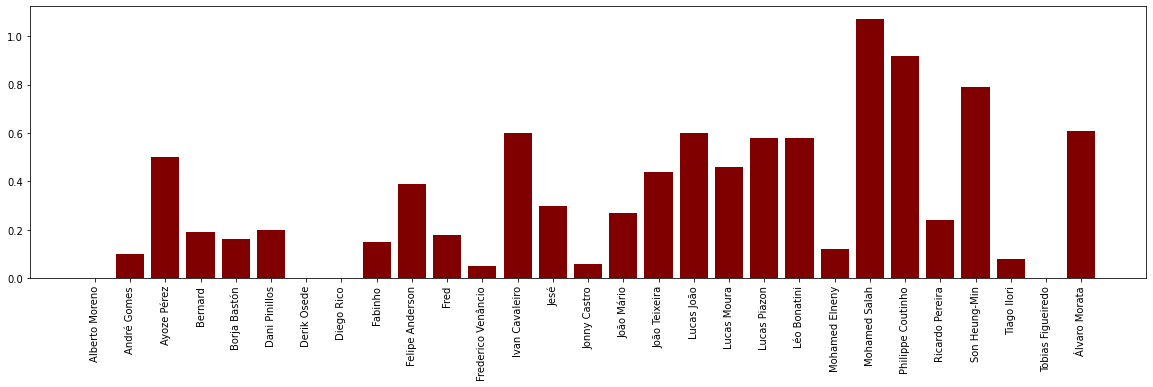

In [ ]:
# Bar Plot
fig = plt.figure(figsize=(20,5))
plt.bar(df_player['name'] , df_player['goal_involvement'] , color = 'maroon',width=0.8)
plt.xticks(rotation=90)
plt.show()



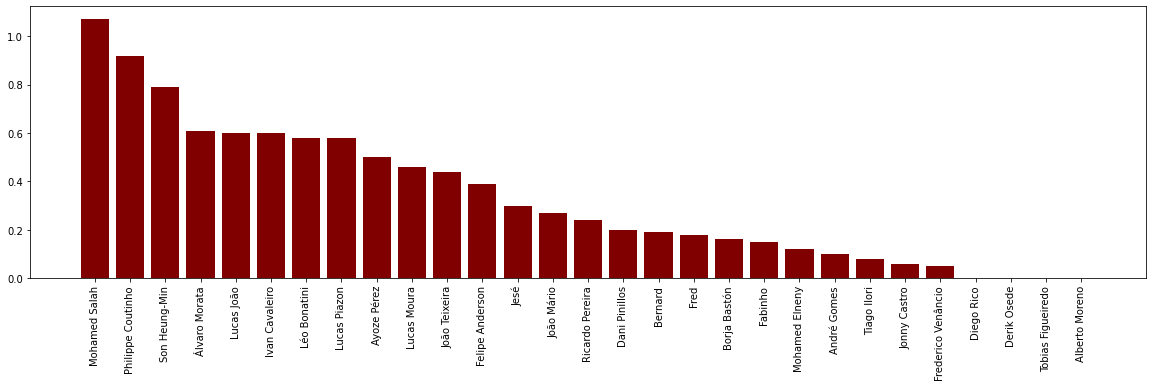

In [ ]:
fig = plt.figure(figsize=(20,5))
x = df_player.sort_values(by='goal_involvement' , ascending=False)
plt.bar(x['name'] , x['goal_involvement'] , color = 'maroon',width=0.8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


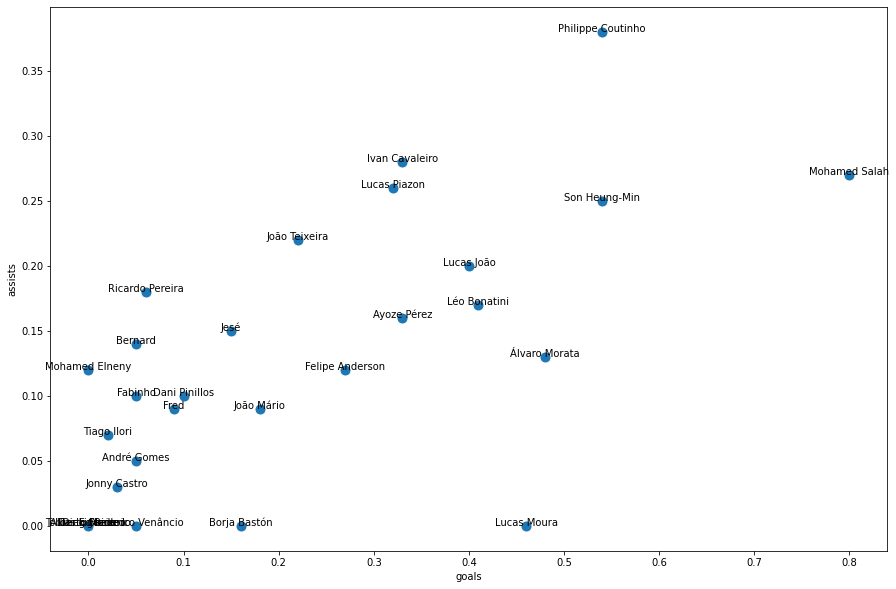

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.scatterplot(df_player.goals , df_player.assists , s=120 , legend=False)

# Put Label

for line in range(0,df_player.shape[0]):
  ax.text(df_player.goals[line] , df_player.assists[line] , df_player.name[line] , 
          horizontalalignment = 'center' , size = 'medium' , color = 'black',
          weight = 'regular')


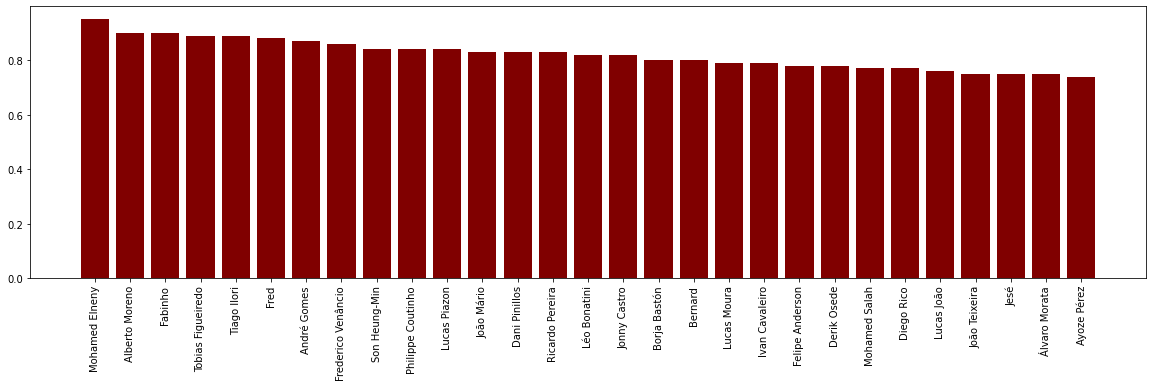

In [ ]:
fig = plt.figure(figsize=(20,5))
x = df_player.sort_values(by='Total_pass%' , ascending=False)
plt.bar(x['name'] , x['Total_pass%'] , color = 'maroon',width=0.8)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


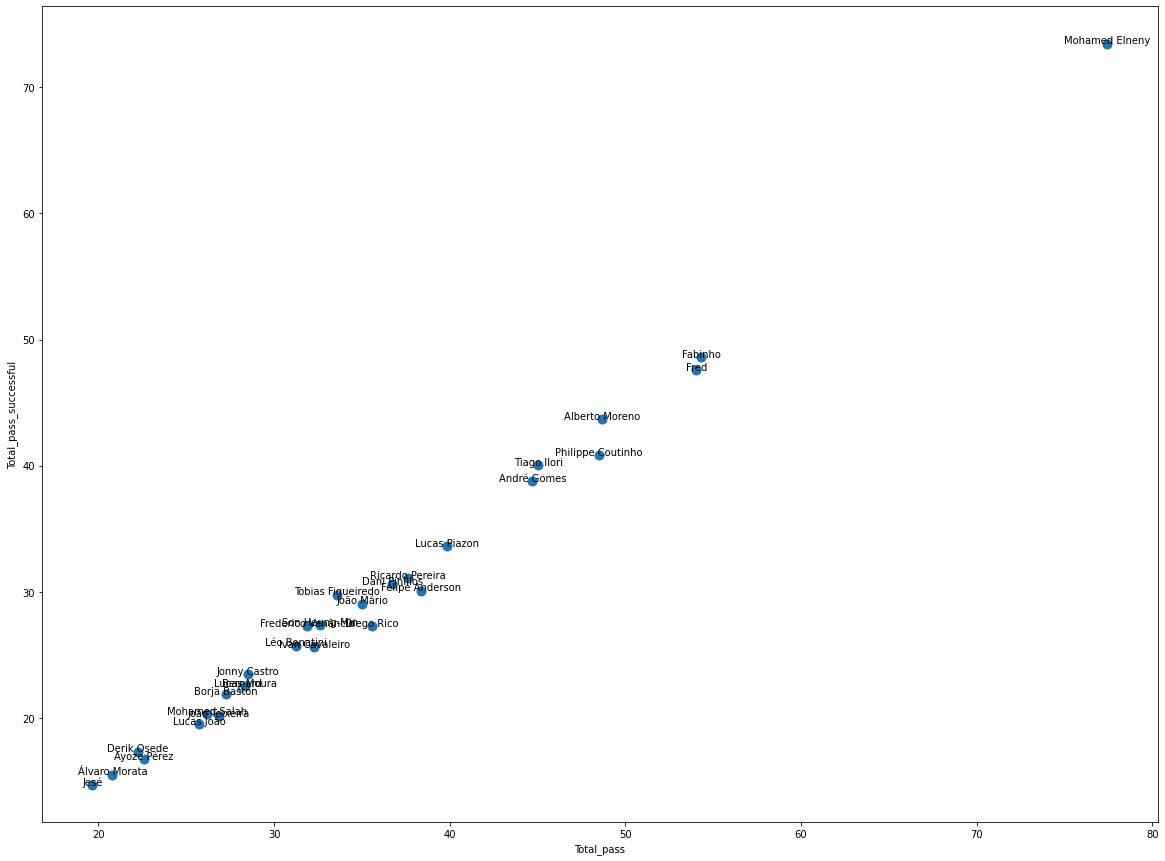

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.scatterplot(df_player.Total_pass , df_player.Total_pass_successful , s=120 , legend=False)

# Put Label

for line in range(0,df_player.shape[0]):
  ax.text(df_player.Total_pass[line] , df_player.Total_pass_successful[line] , df_player.name[line] , 
          horizontalalignment = 'center' , size = 'medium' , color = 'black',
          weight = 'regular')

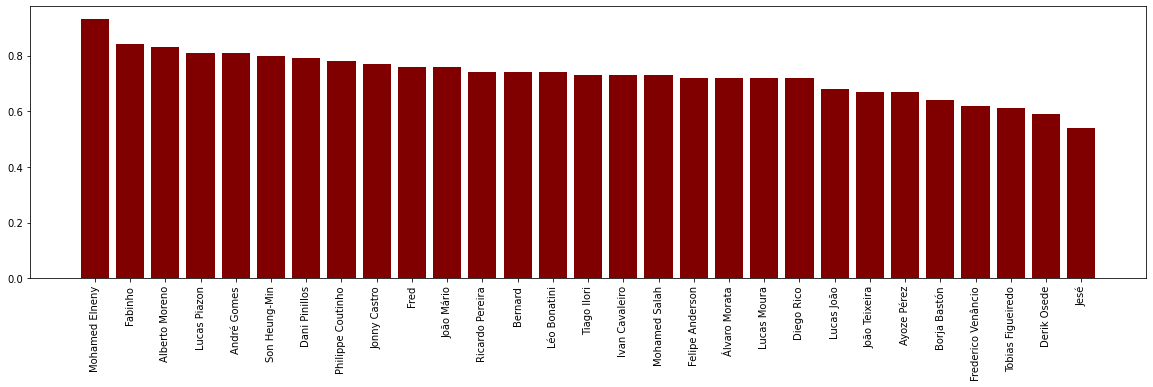

In [ ]:
fig = plt.figure(figsize=(20,5))
x = df_player.sort_values(by='Total_pass_attacking_third%' , ascending=False)
plt.bar(x['name'] , x['Total_pass_attacking_third%'] , color = 'maroon',width=0.8)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


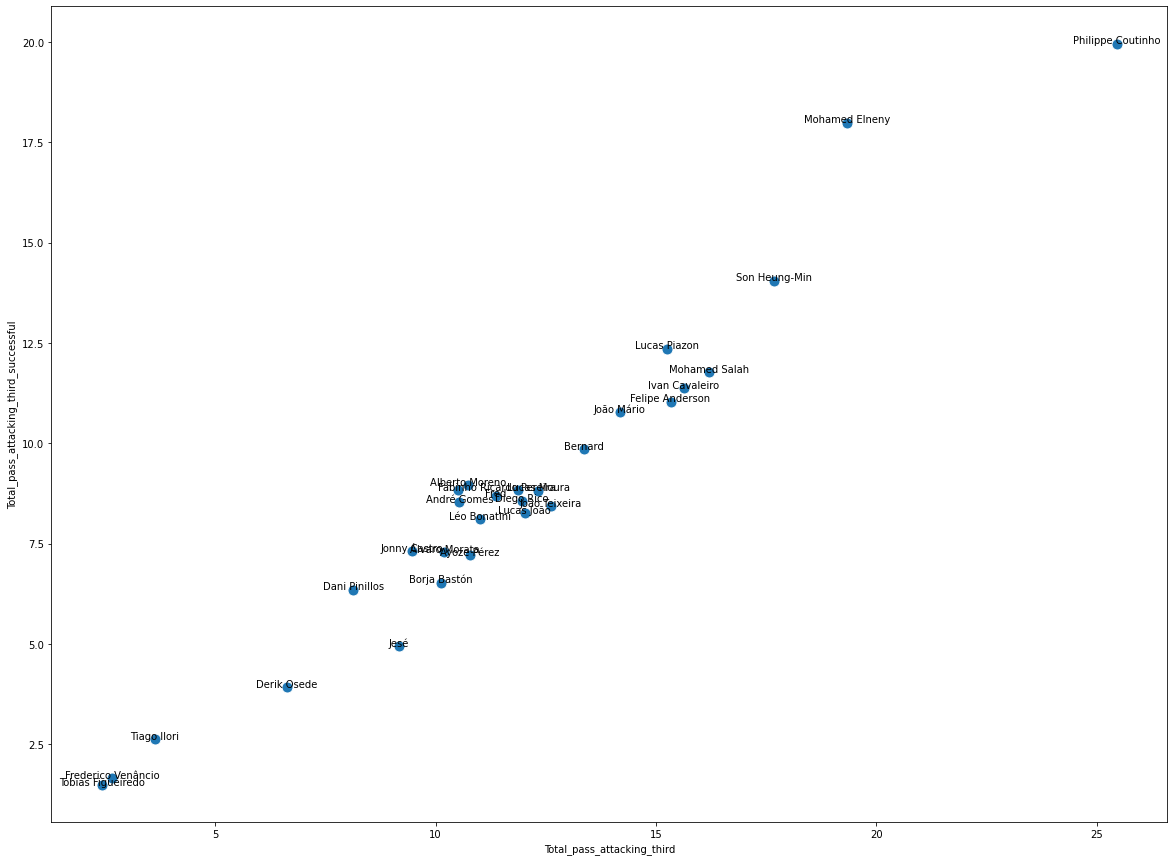

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.scatterplot(df_player.Total_pass_attacking_third , df_player.Total_pass_attacking_third_successful , s=120 , legend=False)

# Put Label

for line in range(0,df_player.shape[0]):
  ax.text(df_player.Total_pass_attacking_third[line] , df_player.Total_pass_attacking_third_successful[line] , df_player.name[line] , 
          horizontalalignment = 'center' , size = 'medium' , color = 'black',
          weight = 'regular')

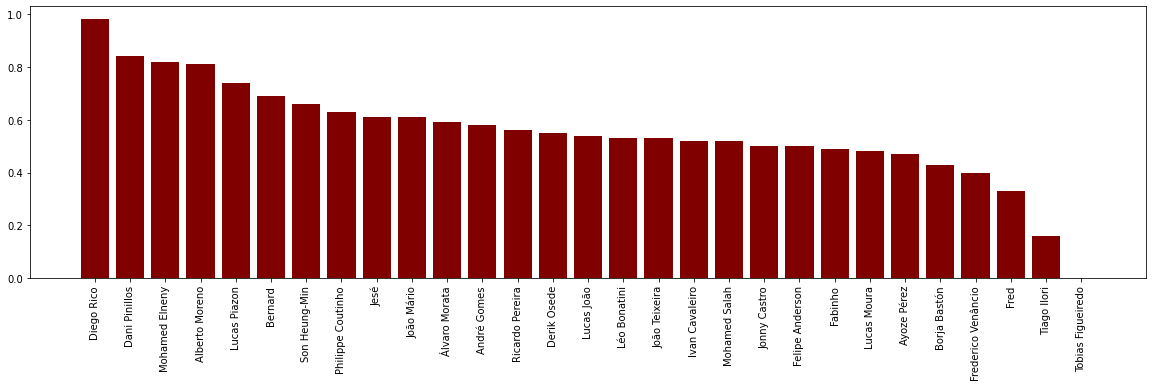

In [ ]:
fig = plt.figure(figsize=(20,5))
x = df_player.sort_values(by='Total_pass_box%' , ascending=False)
plt.bar(x['name'] , x['Total_pass_box%'] , color = 'maroon',width=0.8)
plt.xticks(rotation=90)
plt.show()

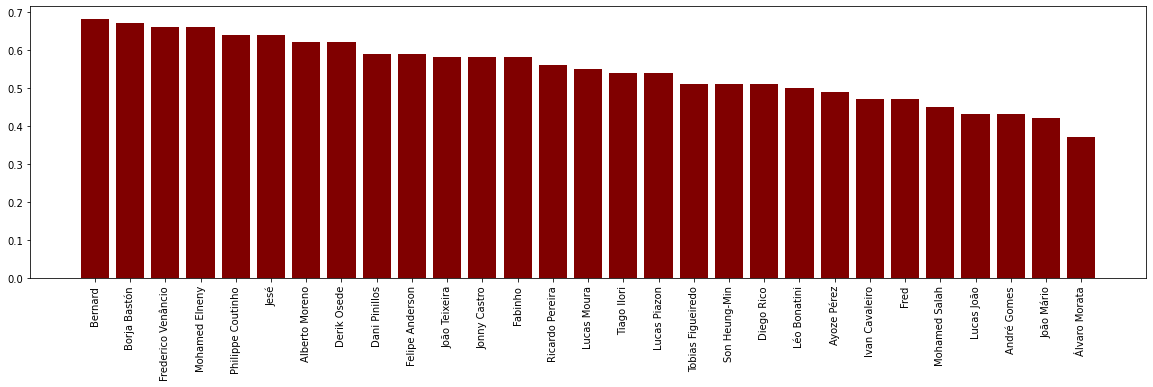

In [ ]:
fig = plt.figure(figsize=(20,5))
x = df_player.sort_values(by='Defensive_duel%' , ascending=False)
plt.bar(x['name'] , x['Defensive_duel%'] , color = 'maroon',width=0.8)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


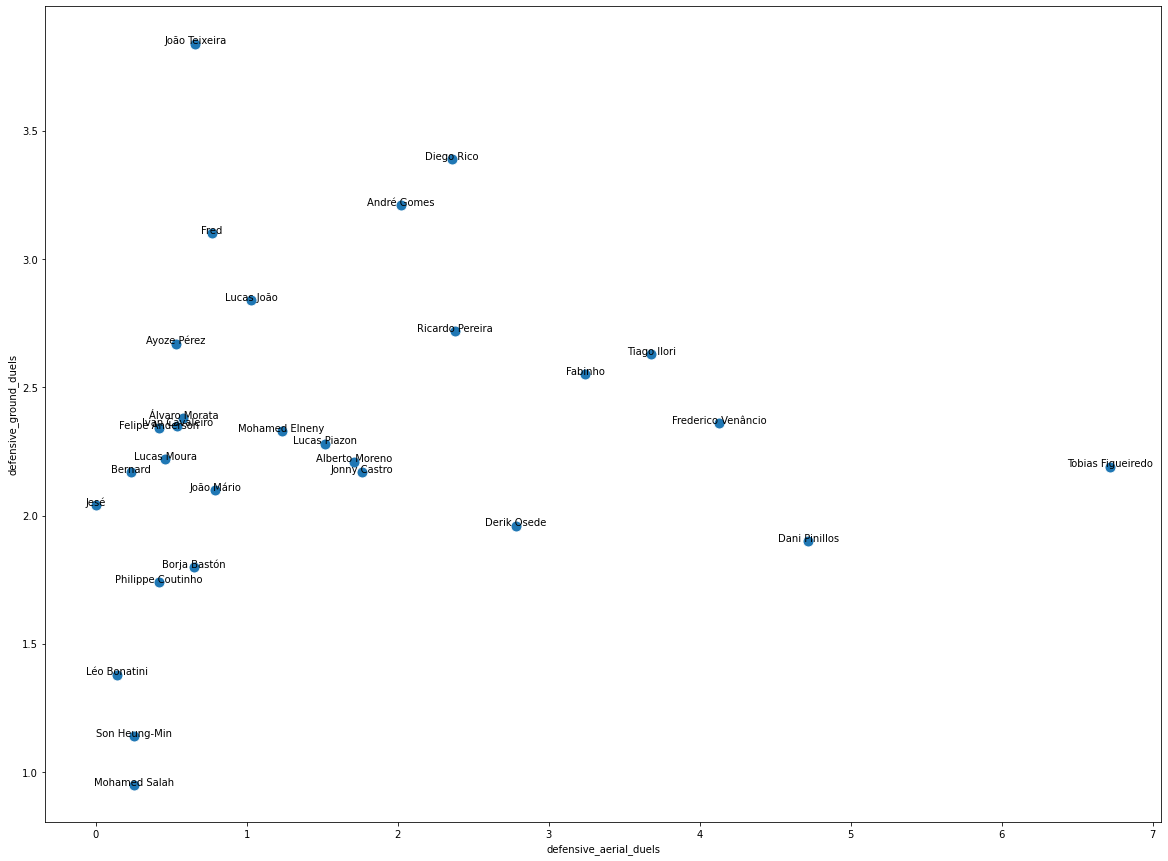

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.scatterplot(df_player.defensive_aerial_duels , df_player.defensive_ground_duels , s=120 , legend=False)

# Put Label

for line in range(0,df_player.shape[0]):
  ax.text(df_player.defensive_aerial_duels[line] , df_player.defensive_ground_duels[line] , df_player.name[line] , 
          horizontalalignment = 'center' , size = 'medium' , color = 'black',
          weight = 'regular')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


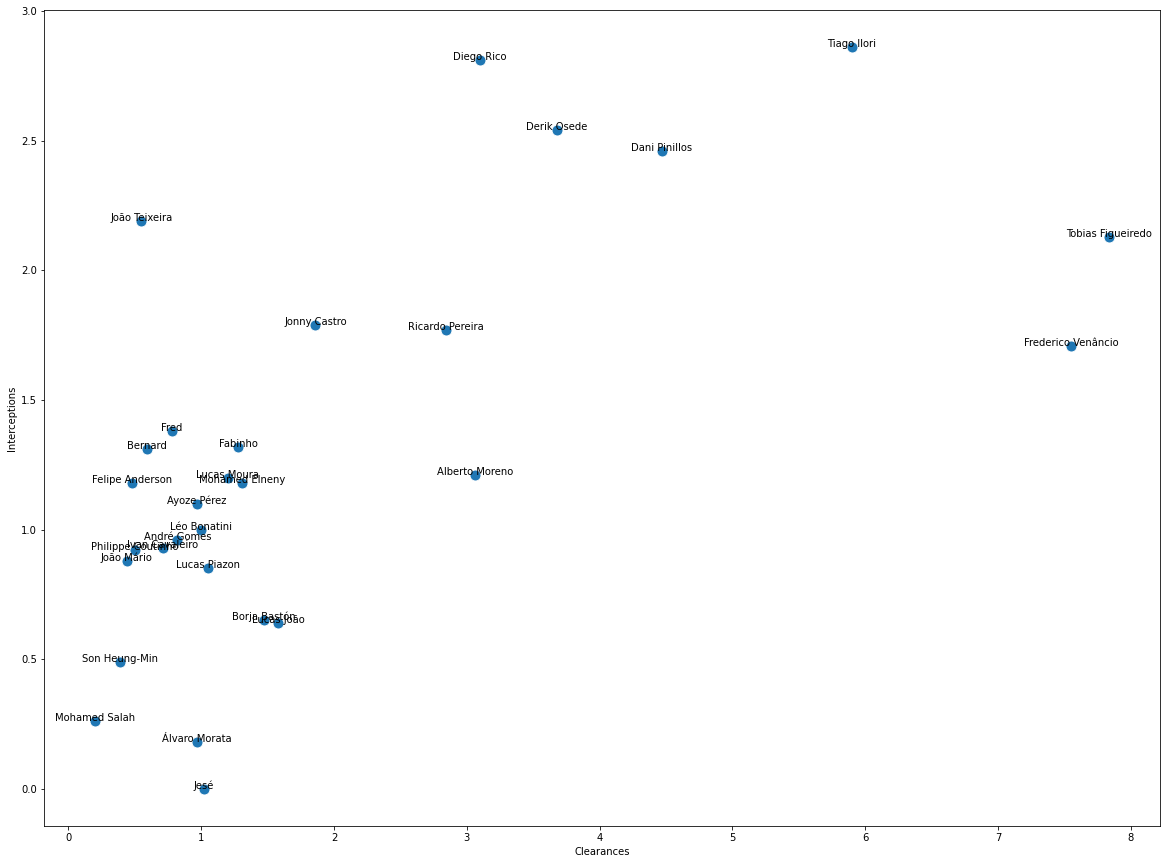

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.scatterplot(df_player.Clearances , df_player.Interceptions , s=120 , legend=False)

# Put Label

for line in range(0,df_player.shape[0]):
  ax.text(df_player.Clearances[line] , df_player.Interceptions[line] , df_player.name[line] , 
          horizontalalignment = 'center' , size = 'medium' , color = 'black',
          weight = 'regular')